<>:46: SyntaxWarning: invalid escape sequence '\l'
<>:46: SyntaxWarning: invalid escape sequence '\l'
C:\Users\User\AppData\Local\Temp\ipykernel_17668\3219524984.py:46: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(time, lambda_arr, 'b-', linewidth=2, label='Trafic $\lambda(t)$ (req/s)')


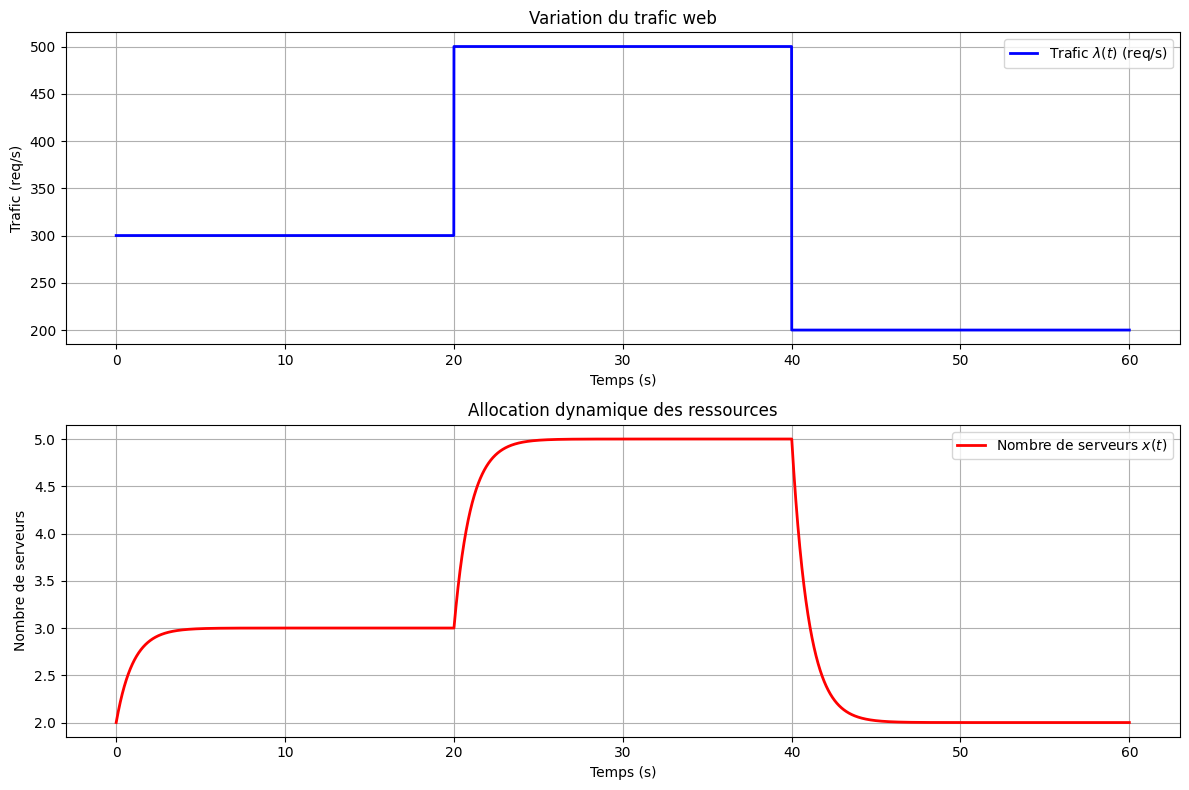

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du système
S = 100         # Capacité de traitement par serveur (req/s)
Kp = 1.0        # Gain proportionnel
T = 60          # Durée totale de la simulation en secondes
dt = 0.01       # Pas de temps pour l'intégration numérique
n_steps = int(T / dt)

# Vecteur temps
time = np.linspace(0, T, n_steps)

# Initialisation des vecteurs pour le nombre de serveurs et le trafic
x = np.zeros(n_steps)         # Nombre de serveurs au cours du temps
lambda_arr = np.zeros(n_steps)  # Trafic (req/s) au cours du temps

# Condition initiale : 2 serveurs alloués au départ
x[0] = 2

# Définition de lambda(t) : trafic variable sur le temps
# Exemple : trafic constant à 300 req/s pendant 20s, puis 500 req/s pendant 20s, ensuite 200 req/s.
for i, t in enumerate(time):
    if t < 20:
        lambda_arr[i] = 300
    elif t < 40:
        lambda_arr[i] = 500
    else:
        lambda_arr[i] = 200

# Simulation de la dynamique par la méthode d'Euler
for i in range(n_steps - 1):
    # Calcul de l'erreur entre l'allocation souhaitée et l'allocation actuelle
    error = lambda_arr[i] / S - x[i]
    # Calcul de la dérivée (taux de variation du nombre de serveurs)
    dx_dt = Kp * error
    # Mise à jour de x par la méthode d'Euler
    x[i+1] = x[i] + dx_dt * dt

# Visualisation des résultats

# Graphique du trafic au cours du temps
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(time, lambda_arr, 'b-', linewidth=2, label='Trafic $\lambda(t)$ (req/s)')
plt.xlabel("Temps (s)")
plt.ylabel("Trafic (req/s)")
plt.title("Variation du trafic web")
plt.legend()
plt.grid(True)

# Graphique de l'allocation des ressources (nombre de serveurs)
plt.subplot(2, 1, 2)
plt.plot(time, x, 'r-', linewidth=2, label='Nombre de serveurs $x(t)$')
plt.xlabel("Temps (s)")
plt.ylabel("Nombre de serveurs")
plt.title("Allocation dynamique des ressources")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
